In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, MinMaxScaler
from scipy.sparse import coo_matrix, csr_matrix
%matplotlib inline
import os 

In [2]:
os.chdir("/Users/sanyas/Desktop/projects")

In [32]:
df_1 = pd.read_csv("Norway_Stan.csv")
df_well = pd.read_csv("Norway.csv")
#Merge the 2 CSVs by Name
df_merged = df_well.merge(df_1, how = "left", on = "Name")
print(df_merged.head())
# merge both the Norway standardized information and given Norway

   Unnamed: 0_x    Name               Surface        X_x         Y_x       Z  \
0         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
1         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
2         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
3         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   
4         21675  10/4-1  CROMER KNOLL GP. Top  628531.41  6394710.62 -1350.9   

       MD  Geological age  TVT  TST  ... Unnamed: 34  Unnamed: 35  \
0  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
1  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
2  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
3  1382.0            4.21  NaN  NaN  ...         NaN          NaN   
4  1382.0            4.21  NaN  NaN  ...         NaN          NaN   

   Unnamed: 36  Unnamed: 37  Unnamed: 0_y        X_y         Y_y  \
0          NaN          NaN         

In [4]:
df_merged.head()

,Unnamed: 0_x,Name,Surface,X_x,Y_x,Z,MD,Geological age,TVT,TST,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 0_y,X_y,Y_y,True Vertical Depth,Normalized TVD,Formation
0,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,0,628531.41,6394710.62,-23025.90,0.112166,-1.215791
1,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,1,628531.41,6394710.62,-23010.90,0.112748,-1.176869
2,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,2,628531.47,6394710.62,-23037.90,0.111701,-1.137946
3,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,3,628531.50,6394710.61,-23061.90,0.110770,-1.099024
4,21675,10/4-1,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,4,628531.27,6394713.59,-23910.88,0.077844,-1.060102


In [5]:
labels = df_merged['Name'].unique().tolist()
mapping = dict( zip(labels,range(len(labels))) )
df_merged.replace({'Name': mapping},inplace=True)
# change name to a numerical values to easier identification

In [6]:
mapping

{'10/4-1': 0,
 '10/5-1': 1,
 '10/7-1': 2,
 '10/8-1': 3,
 '11/10-1': 4,
 '11/5-1': 5,
 '11/9-1': 6,
 '15/12-1': 7,
 '15/12-10 S': 8,
 '15/12-11 S': 9,
 '15/12-12': 10,
 '15/12-13': 11,
 '15/12-13 A': 12,
 '15/12-13 B': 13,
 '15/12-14': 14,
 '15/12-15': 15,
 '15/12-16 S': 16,
 '15/12-17 A': 17,
 '15/12-17 S': 18,
 '15/12-18 A': 19,
 '15/12-18 S': 20,
 '15/12-19': 21,
 '15/12-2': 22,
 '15/12-20 S': 23,
 '15/12-21': 24,
 '15/12-21 A': 25,
 '15/12-22': 26,
 '15/12-23': 27,
 '15/12-23 A': 28,
 '15/12-24 S': 29,
 '15/12-3': 30,
 '15/12-3 T2': 31,
 '15/12-4': 32,
 '15/12-5': 33,
 '15/12-6 S': 34,
 '15/12-6 ST2': 35,
 '15/12-7 S': 36,
 '15/12-8': 37,
 '15/12-8 A': 38,
 '15/12-9 ST2': 39,
 '15/2-1': 40,
 '15/3-1 S': 41,
 '15/3-1 ST2': 42,
 '15/3-2': 43,
 '15/3-2 R': 44,
 '15/3-3': 45,
 '15/3-4': 46,
 '15/3-5': 47,
 '15/3-6': 48,
 '15/3-7': 49,
 '15/3-8': 50,
 '15/3-9': 51,
 '15/3-9 T2': 52,
 '15/5-1': 53,
 '15/5-2': 54,
 '15/5-3': 55,
 '15/5-4': 56,
 '15/5-5': 57,
 '15/5-6': 58,
 '15/5-7': 59,
 

In [7]:
df_merged

,Unnamed: 0_x,Name,Surface,X_x,Y_x,Z,MD,Geological age,TVT,TST,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 0_y,X_y,Y_y,True Vertical Depth,Normalized TVD,Formation
0,21675,0,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,0,628531.41,6394710.62,-23025.90,0.112166,-1.215791
1,21675,0,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,1,628531.41,6394710.62,-23010.90,0.112748,-1.176869
2,21675,0,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,2,628531.47,6394710.62,-23037.90,0.111701,-1.137946
3,21675,0,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,3,628531.50,6394710.61,-23061.90,0.110770,-1.099024
4,21675,0,CROMER KNOLL GP. Top,628531.41,6394710.62,-1350.9,1382.0,4.21,NaN,NaN,...,NaN,NaN,NaN,NaN,4,628531.27,6394713.59,-23910.88,0.077844,-1.060102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484299,18872,1099,HORDALAND GP. Top,580466.31,6356474.78,-537.5,568.0,13.00,NaN,NaN,...,NaN,NaN,NaN,NaN,21671,580466.31,6356474.78,-20080.50,0.226400,-0.631959
484300,18872,1099,HORDALAND GP. Top,580466.31,6356474.78,-537.5,568.0,13.00,NaN,NaN,...,NaN,NaN,NaN,NaN,21672,580466.31,6356474.78,-18944.50,0.270458,-0.593036
484301,18872,1099,HORDALAND GP. Top,580466.31,6356474.78,-537.5,568.0,13.00,NaN,NaN,...,NaN,NaN,NaN,NaN,21673,580466.31,6356474.78,-20622.50,0.205379,-0.554114
484302,18872,1099,HORDALAND GP. Top,580466.31,6356474.78,-537.5,568.0,13.00,NaN,NaN,...,NaN,NaN,NaN,NaN,21674,580466.31,6356474.78,-20662.50,0.203828,-0.515192


In [33]:
df_merged['True Vertical Depth'] = df_merged['True Vertical Depth'] - df_merged['True Vertical Depth'].min()
# this normalizes the true vertical depth that is in df merged

In [34]:
def sample_splitter(df_merged, fraction, random_seed):
    test = df_merged.sample(frac=fraction, random_state=random_seed)
    test_idx = test.index.values
    train =  df_merged.drop(test_idx)
    return train, test

In [64]:
train, test = sample_splitter(df_merged, 0.2, 86)

In [65]:
print(f'Training size is {len(train)} tops, and test size is {len(test)} tops')

Training size is 387443 tops, and test size is 96861 tops


In [66]:
D_df = df_merged.pivot_table('True Vertical Depth',"Formation","Name").fillna(0)
df_merged[["True Vertical Depth", "Formation", "Name"]]

,True Vertical Depth,Formation,Name
0,2892.10,-1.215791,10/4-1
1,2907.10,-1.176869,10/4-1
2,2880.10,-1.137946,10/4-1
3,2856.10,-1.099024,10/4-1
4,2007.12,-1.060102,10/4-1
...,...,...,...
484299,5837.50,-0.631959,9/8-1
484300,6973.50,-0.593036,9/8-1
484301,5295.50,-0.554114,9/8-1
484302,5255.50,-0.515192,9/8-1


In [67]:
D_df

Name,10/4-1,10/5-1,10/7-1,10/8-1,11/10-1,11/5-1,11/9-1,15/12-1,15/12-10 S,15/12-11 S,...,9/2-8 ST4,9/2-9 S,9/3-1,9/3-2,9/4-1,9/4-2,9/4-3,9/4-4,9/4-5,9/8-1
Formation,,,,,,,,,,,,,,,,,,,,,
-1.215791,2892.10,4073.0,11236.12,3308.0,5606.65,4450.07,0.0,21744.44,21541.85,21544.0,...,8552.050,8345.24,6506.31,6284.11,5674.0,5448.0,5506.0,5564.0,5443.05,5448.5
-1.176869,2907.10,4067.0,0.00,3319.0,5593.65,0.00,0.0,21731.44,21533.85,21537.0,...,8541.050,8350.24,6499.31,0.00,5690.0,5446.0,5508.0,5570.0,0.00,5456.5
-1.137946,2880.10,4031.0,0.00,3303.0,0.00,4400.09,0.0,0.00,0.00,0.0,...,8525.410,8300.65,6478.32,6292.11,5673.0,5421.0,5470.0,5522.0,0.00,0.0
-1.099024,2856.10,3981.0,0.00,3185.0,5593.65,4110.11,0.0,0.00,21523.63,21544.0,...,8420.670,8250.06,6387.34,6185.13,5645.0,5399.0,5392.0,5409.0,0.00,5388.5
-1.060102,2007.12,3635.0,10730.19,0.0,0.00,3549.12,0.0,21606.45,21360.97,21380.0,...,6961.305,6886.74,5575.75,4703.39,5201.0,4909.0,4974.0,4704.0,4747.11,5147.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.871034,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
2.909956,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
2.948878,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.000,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0


In [68]:
df_merged['True Vertical Depth'] = df_merged['True Vertical Depth'] - df_merged['True Vertical Depth'].min()

In [69]:
R = D_df.values
well_depth_mean = np.mean(R, axis=1) #mean depth in each well
R_demeaned = R - well_depth_mean.reshape(-1, 1)

In [70]:
from sklearn.preprocessing import binarize
A = binarize(R)

In [71]:
def runALS(A, R, n_factors, n_iterations, lambda_):
    """
    Runs Alternating Least Squares algorithm in order to calculate matrix.
    :param A: User-Item Matrix with ratings
    :param R: User-Item Matrix with 1 if there is a rating or 0 if not
    :param n_factors: How many factors each of user and item matrix will consider
    :param n_iterations: How many times to run algorithm
    :param lambda_: Regularization parameter
    :return:
    """
    print("Initiating ")
    MAE = []
    for i in range(1, n_factors):
        lambda_ = lambda_
        n_factors = i
        n, m = A.shape
        n_iterations = n_iterations
        Users = 5 * np.random.rand(n, n_factors)
        Items = 5 * np.random.rand(n_factors, m)

        def get_error(A, Users, Items, R):
            # This calculates the MSE of nonzero elements
            return np.sum((R * (A - np.dot(Users, Items))) ** 2) / np.sum(R)

        MSE_List = []

        print("Starting Iterations")
        for iter in range(n_iterations):
            for i, Ri in enumerate(R):
                Users[i] = np.linalg.solve(
                    np.dot(Items, np.dot(np.diag(Ri), Items.T))
                    + lambda_ * np.eye(n_factors),
                    np.dot(Items, np.dot(np.diag(Ri), A[i].T)),
                    ).T
            print(
                "Error after solving for User Matrix:",
                get_error(A, Users, Items, R),
                )

            for j, Rj in enumerate(R.T):
                Items[:, j] = np.linalg.solve(
                    np.dot(Users.T, np.dot(np.diag(Rj), Users))
                    + lambda_ * np.eye(n_factors),
                    np.dot(Users.T, np.dot(np.diag(Rj), A[:, j])),
                    )
            print(
                "Error after solving for Item Matrix:",
                 get_error(A, Users, Items, R),
                )

            MSE_List.append(get_error(A, Users, Items, R))
            print("%sth iteration is complete..." % iter)
        MAE.append(MSE_List)
    return Users, Items, MAE

In [72]:
U, Vt, M_list = runALS(R, A, 20, 5, 0.1) #initialize ALS

Initiating 
Starting Iterations
Error after solving for User Matrix: 79866836.55293928
Error after solving for Item Matrix: 1705338.5358470266
0th iteration is complete...
Error after solving for User Matrix: 420020.6987958139
Error after solving for Item Matrix: 302230.3712422559
1th iteration is complete...
Error after solving for User Matrix: 281850.47884547
Error after solving for Item Matrix: 277578.1621843673
2th iteration is complete...
Error after solving for User Matrix: 276392.8913041377
Error after solving for Item Matrix: 276065.9275225043
3th iteration is complete...
Error after solving for User Matrix: 275950.45685290016
Error after solving for Item Matrix: 275916.74188231427
4th iteration is complete...
Starting Iterations
Error after solving for User Matrix: 61381542.01765802
Error after solving for Item Matrix: 1233629.0011605038
0th iteration is complete...
Error after solving for User Matrix: 302171.28651395533
Error after solving for Item Matrix: 135244.11696110244


Error after solving for User Matrix: 17040.218686661334
Error after solving for Item Matrix: 9380.519735706643
2th iteration is complete...
Error after solving for User Matrix: 6601.501647720876
Error after solving for Item Matrix: 4293.6986712765465
3th iteration is complete...
Error after solving for User Matrix: 3377.8942062045603
Error after solving for Item Matrix: 2590.0911804317966
4th iteration is complete...
Starting Iterations
Error after solving for User Matrix: 40032447.300596036
Error after solving for Item Matrix: 184707.85890432456
0th iteration is complete...
Error after solving for User Matrix: 63140.07957458801
Error after solving for Item Matrix: 22461.057711030415
1th iteration is complete...
Error after solving for User Matrix: 15804.05684463397
Error after solving for Item Matrix: 10359.78972301519
2th iteration is complete...
Error after solving for User Matrix: 8049.3757248068605
Error after solving for Item Matrix: 5892.132097634006
3th iteration is complete...

In [73]:
recommendations = np.dot(U, Vt)
recsys = pd.DataFrame(data = recommendations[0:, 0:], index = D_df.index,
                        columns = D_df.columns)
recsys.head() #create a dataframe of recommendations

Name,10/4-1,10/5-1,10/7-1,10/8-1,11/10-1,11/5-1,11/9-1,15/12-1,15/12-10 S,15/12-11 S,...,9/2-8 ST4,9/2-9 S,9/3-1,9/3-2,9/4-1,9/4-2,9/4-3,9/4-4,9/4-5,9/8-1
Formation,,,,,,,,,,,,,,,,,,,,,
-1.215791,2892.891304,4050.262087,11236.124878,3312.865611,5606.183170,4450.065448,2781.928817,21728.314377,21542.068139,21520.100972,...,8553.252226,8344.737340,6507.776078,6285.755005,5678.263354,5448.579431,5500.062870,5568.564549,5444.453791,5448.650324
-1.176869,2906.980003,4084.889529,11358.918204,3316.016014,5593.735537,4606.507227,2864.347512,21741.537135,21533.543883,21557.329958,...,8540.938500,8350.904786,6499.465620,6598.228948,5681.811069,5438.413414,5509.247623,5565.528358,5415.848927,5456.443448
-1.137946,2879.942149,4028.079190,9242.973655,3309.916889,951.600130,4400.086545,2946.807118,20072.310156,21953.162060,20742.865049,...,8524.984351,8300.503607,6478.363174,6291.934776,5671.469477,5417.166925,5467.135324,5521.227499,5678.194173,3065.786581
-1.099024,2855.983196,3964.773859,11286.182140,3181.796777,5593.707858,4110.111886,2699.769407,20584.811655,21523.881874,21541.850943,...,8420.526819,8250.353675,6386.584272,6184.890679,5646.853717,5398.231503,5392.437585,5411.424910,5242.212297,5388.501173
-1.060102,2007.244986,3639.314510,10730.190782,4232.383812,10554.113936,3549.122893,3233.512157,21611.709378,21360.947101,21375.055886,...,6961.509781,6886.669215,5575.562230,4703.433853,5200.300385,4908.085099,4973.826401,4703.467546,4746.883604,5147.496607


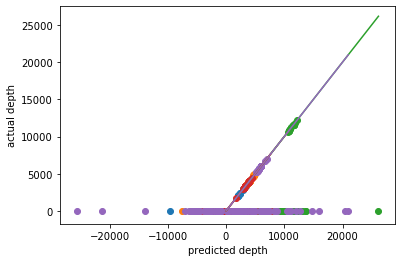

In [74]:
for i in range(5):
    plt.scatter(recsys.iloc[0:, i].values, D_df.iloc[0:, i].values) #plot predicted vs actual
    plt.xlabel('predicted depth')
    plt.ylabel('actual depth')
    plt.plot(np.arange(0,recsys.iloc[0:,i].max()))
    #graph shows predictions compared to the actual

In [75]:
newDF = recsys.T
newDF.reset_index(inplace=True) # convert the recsys to how test data looked

In [76]:
newDF

Formation,Name,-1.215790665784773,-1.176868528626274,-1.1379463914677752,-1.0990242543092763,-1.0601021171507774,-1.0211799799922785,-0.9822578428337796,-0.9433357056752808,-0.904413568516782,...,2.676423050065115,2.7153451872236136,2.7542673243821127,2.7931894615406114,2.8321115986991106,2.871033735857609,2.9099558730161084,2.948878010174607,2.9878001473331057,3.0267222844916053
0,10/4-1,2892.891304,2906.980003,2879.942149,2855.983196,2007.244986,1975.107460,2013.070173,3701.994997,3696.271095,...,3749.371509,218.229735,196.826285,-31.934614,7.229790,30.607382,1969.972852,1787.869477,-106.339477,685.262950
1,10/5-1,4050.262087,4084.889529,4028.079190,3964.773859,3639.314510,3620.080187,3640.014589,4755.932832,4801.264390,...,4899.149700,462.357052,409.479507,1986.940015,6.613048,3765.927340,872.122943,4390.879501,-25.464734,1338.354325
2,10/7-1,11236.124878,11358.918204,9242.973655,11286.182140,10730.190782,10623.199297,10724.187330,11480.100745,11527.623531,...,6961.813462,2461.860890,2174.314513,1792.555550,28.282034,7069.546710,-46.000462,6110.040962,101.615864,223.923822
3,10/8-1,3312.865611,3316.016014,3309.916889,3181.796777,4232.383812,4042.690702,3125.973233,3858.645305,3851.913880,...,2917.200548,-1177.237500,-999.999392,551.951756,32.405898,485.213404,663.552674,698.019874,-151.993053,424.180462
4,11/10-1,5606.183170,5593.735537,951.600130,5593.707858,10554.113936,1812.675035,6487.281221,6061.942996,6042.201732,...,-5162.718795,-6319.890737,-5413.410391,-3478.105926,121.946785,-2561.041054,2515.285503,-7023.413581,-783.956240,2142.198509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,9/4-2,5448.579431,5438.413414,5417.166925,5398.231503,4908.085099,4851.755491,4899.383133,6030.108854,6039.463567,...,4481.911619,-836.118280,-712.598425,1232.295326,20.286518,2398.154374,774.155246,2426.261317,-192.170512,666.323474
1096,9/4-3,5500.062870,5509.247623,5467.135324,5392.437585,4973.826401,4962.207230,4971.700428,6144.246684,6144.341071,...,5192.736470,-372.464883,-305.675077,1110.786790,22.636467,2319.758693,438.218552,1814.222466,-139.158832,259.689902
1097,9/4-4,5568.564549,5565.528358,5521.227499,5411.424910,4703.467546,4586.637163,4683.190673,6140.047066,6144.409880,...,4163.528589,-389.845738,-338.225287,1230.098186,2.556421,2993.780504,924.153759,3469.475286,-105.109046,790.651992
1098,9/4-5,5444.453791,5415.848927,5678.194173,5242.212297,4746.883604,4663.040190,4750.922282,6203.782086,6199.114109,...,7281.575009,-339.187663,-311.850100,1665.663538,-18.090381,2297.161712,747.071096,3416.755910,-221.296062,602.421001


In [77]:
flat_preds = pd.DataFrame(recsys.unstack()).reset_index() #this flattens the list of predictions
#now combine the flattened predictions with the test dataset, merged on API and Formation
new_df = pd.merge(test, flat_preds,  how='left', left_on=['Name','Formation'], right_on = ['Name','Formation'])

In [78]:
new_df

,Unnamed: 0_x,Name,Surface,X_x,Y_x,Z,MD,Geological age,TVT,TST,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 0_y,X_y,Y_y,True Vertical Depth,Normalized TVD,Formation,0
0,10700,35/11-4 R,Cook Fm. Top,529621.13,6766782.05,-2810.00,2835.0,188.0,NaN,NaN,...,NaN,NaN,NaN,18175,529621.13,6766782.05,12314.00,0.477583,1.820136,12309.627336
1,2367,31/2-4 R2,Johansen Mb. Top,527834.79,6747076.61,-2101.00,2126.0,192.0,NaN,NaN,...,NaN,NaN,NaN,12201,527834.79,6747076.61,21333.00,0.827374,1.820136,21332.977586
2,11590,35/9-7,Utsira Fm. Top,536102.11,6793048.63,-613.99,643.0,0.0,NaN,NaN,...,NaN,NaN,NaN,19312,536106.28,6793047.01,13019.03,0.504927,-0.670881,12935.833669
3,21098,31/1-1,VIKING GP. Top,517128.07,6742830.67,-2025.87,2051.0,137.2,NaN,NaN,...,NaN,NaN,NaN,11835,517127.01,6742834.58,3047.09,0.118178,-0.709803,3064.559087
4,9430,25/2-6,Balder Fm. Top,474815.22,6624835.98,-2122.55,2148.0,53.0,NaN,NaN,...,NaN,NaN,NaN,7377,474823.98,6624851.53,13265.43,0.514483,-1.060102,13273.216484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96856,1972,15/3-1 S,Ekofisk Fm. Top,426161.01,6524110.10,-2690.00,2715.0,0.0,NaN,NaN,...,NaN,NaN,NaN,861,426161.01,6524110.10,20797.00,0.806585,0.924927,20800.252873
96857,13806,35/3-5,Aasgard Fm. Top,548099.60,6851989.76,-3606.00,3639.0,117.0,NaN,NaN,...,NaN,NaN,NaN,18584,548099.60,6851989.76,8278.00,0.321052,0.146484,8301.451548
96858,9183,34/10-42 S,VIKING GP. Top,461726.79,6764528.76,-3794.13,3960.0,137.2,NaN,NaN,...,NaN,NaN,NaN,14686,461297.94,6763994.53,16597.00,0.643694,-0.593036,16601.982308
96859,20075,7/11-12 A,Roedby Fm. Top,475333.50,6319689.19,-4711.61,4995.0,98.9,NaN,NaN,...,NaN,NaN,NaN,19804,475871.17,6319485.12,2434.08,0.094403,-0.904414,2328.728709


In [79]:
new_df.rename(columns={0:'TVD_pred'}, inplace=True)
new_df.rename(columns={"True Vertical Depth":'TVD'}, inplace=True)
cleanDF = new_df
cleanDF['signed_error'] = (cleanDF['TVD'] - cleanDF['TVD_pred'])# clean df is a new data frame with differences between the actual and predicted

In [80]:
cleanDF

,Unnamed: 0_x,Name,Surface,X_x,Y_x,Z,MD,Geological age,TVT,TST,...,Unnamed: 36,Unnamed: 37,Unnamed: 0_y,X_y,Y_y,TVD,Normalized TVD,Formation,TVD_pred,signed_error
0,10700,35/11-4 R,Cook Fm. Top,529621.13,6766782.05,-2810.00,2835.0,188.0,NaN,NaN,...,NaN,NaN,18175,529621.13,6766782.05,12314.00,0.477583,1.820136,12309.627336,4.372664
1,2367,31/2-4 R2,Johansen Mb. Top,527834.79,6747076.61,-2101.00,2126.0,192.0,NaN,NaN,...,NaN,NaN,12201,527834.79,6747076.61,21333.00,0.827374,1.820136,21332.977586,0.022414
2,11590,35/9-7,Utsira Fm. Top,536102.11,6793048.63,-613.99,643.0,0.0,NaN,NaN,...,NaN,NaN,19312,536106.28,6793047.01,13019.03,0.504927,-0.670881,12935.833669,83.196331
3,21098,31/1-1,VIKING GP. Top,517128.07,6742830.67,-2025.87,2051.0,137.2,NaN,NaN,...,NaN,NaN,11835,517127.01,6742834.58,3047.09,0.118178,-0.709803,3064.559087,-17.469087
4,9430,25/2-6,Balder Fm. Top,474815.22,6624835.98,-2122.55,2148.0,53.0,NaN,NaN,...,NaN,NaN,7377,474823.98,6624851.53,13265.43,0.514483,-1.060102,13273.216484,-7.786484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96856,1972,15/3-1 S,Ekofisk Fm. Top,426161.01,6524110.10,-2690.00,2715.0,0.0,NaN,NaN,...,NaN,NaN,861,426161.01,6524110.10,20797.00,0.806585,0.924927,20800.252873,-3.252873
96857,13806,35/3-5,Aasgard Fm. Top,548099.60,6851989.76,-3606.00,3639.0,117.0,NaN,NaN,...,NaN,NaN,18584,548099.60,6851989.76,8278.00,0.321052,0.146484,8301.451548,-23.451548
96858,9183,34/10-42 S,VIKING GP. Top,461726.79,6764528.76,-3794.13,3960.0,137.2,NaN,NaN,...,NaN,NaN,14686,461297.94,6763994.53,16597.00,0.643694,-0.593036,16601.982308,-4.982308
96859,20075,7/11-12 A,Roedby Fm. Top,475333.50,6319689.19,-4711.61,4995.0,98.9,NaN,NaN,...,NaN,NaN,19804,475871.17,6319485.12,2434.08,0.094403,-0.904414,2328.728709,105.351291


In [81]:
from sklearn.metrics import mean_absolute_error as MSE
print(MSE(cleanDF.TVD.values, cleanDF.TVD_pred.values))

23.693412968448182
